# 22/1/31(화요일`)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
survey_raw_df = pd.read_csv("data/survey_results_public.csv", index_col = "ResponseId")
# survey_raw_df

In [3]:
schema_raw = pd.read_csv("data/survey_results_schema.csv", index_col = "qname")["question"] #col이 인덱스, ["qestion"]이 벨류 -> 시리즈 형태로
# schema_raw

In [8]:
schema_raw.index

Index(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'S3', 'Language', 'Database', 'Platform',
       'Webframe', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys',
       'VersionControlSystem', 'VCInteraction', 'VCHosting',
       'OfficeStackAsync', 'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Onboarding',
       'ProfessionalTech', 'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowl

In [9]:
schema_raw["CompTotal"]

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [10]:
schema_raw["CompFreq"]

'Is that compensation weekly, monthly, or yearly?'

In [11]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [13]:
pd.set_option('display.max_columns', 78) #표현되는 칼럼 최대 개수, 78개로해줘

In [12]:
pd.set_option('display.max_rows', 78) 

In [14]:
selected_columns = [
#인구통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
#프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
# 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]

In [15]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [16]:
survey_raw_df.columns 

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [22]:
survey_df.DevType.value_counts()  

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  7142
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5301
Developer, front-end                                                                                                                            

In [36]:
#연습
##시리즈를 인자로 받아오기
##벨류의 구분자는 ;
##시리즈는 item()메서드를 사용해 루프가능
##반환값으로 각 제일 작은 단위의 응답항목을 칼럼으로 갖는 DF를 줌
##응답자가 제일 작은 단위의 기술 스텍을 선택한 경우 -> 해당 열의 값을 True로, 아닌경우 False로
##NaN값은 전부 False

count_dev = survey_df.DevType.value_counts()
# count_dev


count_dev.fillna(False)

sep = ";"

.items()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  7142
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5301
Developer, front-end                                                                                                                            

In [37]:
#선생님 코드
def split_multicolumn(col_series):
    # 반환할 DataFrame이자 최초의 col_series도 담는다.
    result_df = pd.DataFrame(col_series.values, index=col_series.index, columns=["DevType"])
    # result_df = col_series.to_frame() --> 위의 코드와 같다.
   

    # 기술 스텍 목록을 담았다가 마지막 반환할 때 인덱싱으로 활용
    options = []
    
    
    # NaN 값을 갖는 row를 제외하고 반복
    for idx, value  in col_series[col_series.notnull()].items():
        # value를 가져와 ';'를 기준으로 분리하여 각 기술 스텍 문자열 리스트를 만든다.
        for option in value.split(';'):
            # 현재 option이 result_df.columns에 없으면 추가한다.
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            # 파싱한 기술 스텍에 해당하는 column의 값에 True를 넣는다.
            result_df.at[idx, option] = True
            # result_df.loc[idx, option] = True
    return result_df[options]


# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html

In [52]:
#위 연습응용 문제

def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
   
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
df_type = split_multicolumn(survey_df['DevType'])
df_type

,Data scientist or machine learning specialist,"Developer, full-stack","Developer, front-end","Developer, back-end","Developer, desktop or enterprise applications",Engineering manager,"Engineer, data",Student,Other (please specify):,"Engineer, site reliability","Developer, mobile",Marketing or sales professional,"Developer, embedded applications or devices",DevOps specialist,Designer,Database administrator,System administrator,"Developer, QA or test",Product manager,Project manager,Data or business analyst,"Senior Executive (C-Suite, VP, etc.)",Security professional,Educator,Academic researcher,"Developer, game or graphics",Cloud infrastructure engineer,Scientist,Blockchain
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
# split_multicolumn(survey_df['DevType'])
dev_type_to = df_type.sum().sort_values(ascending = False)
dev_type_to


Developer, full-stack                            28701
Developer, back-end                              26595
Developer, front-end                             15915
Developer, desktop or enterprise applications     9546
Developer, mobile                                 7634
DevOps specialist                                 6170
Student                                           5595
Cloud infrastructure engineer                     5283
Database administrator                            4934
System administrator                              4908
Developer, embedded applications or devices       3923
Project manager                                   3897
Designer                                          3764
Engineer, data                                    3600
Engineering manager                               3574
Data scientist or machine learning specialist     3424
Data or business analyst                          3201
Developer, QA or test                             3096
Academic r

In [69]:
dev_type_per = dev_type_to / dev_type_to.sum() * 100
dev_type_per

Developer, full-stack                            17.416712
Developer, back-end                              16.138722
Developer, front-end                              9.657746
Developer, desktop or enterprise applications     5.792827
Developer, mobile                                 4.632563
DevOps specialist                                 3.744159
Student                                           3.395230
Cloud infrastructure engineer                     3.205898
Database administrator                            2.994114
System administrator                              2.978336
Developer, embedded applications or devices       2.380606
Project manager                                   2.364828
Designer                                          2.284119
Engineer, data                                    2.184599
Engineering manager                               2.168821
Data scientist or machine learning specialist     2.077796
Data or business analyst                          1.9424

In [70]:
round(dev_type_per.sum(), 2)

100.0

In [71]:
import matplotlib.font_manager as font_manager



# Add every font at the specified location
font_dir = ['C:/python/fonts'] #폰트 설치 안하고 파일에 넣어 주기만 하면됨
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname = font).get_name()) #이름확인
    font_manager.fontManager.addfont(font) #추가

    
# Set font family globally    
mpl.rcParams['font.family'] = 'Gugi'
print(mpl.rcParams['font.family']) 



mpl.rcParams["font.family"] = "Gugi"
mpl.rcParams["axes.unicode_minus"] = False

##font.family : 기본 폰트 종류 적용
##axes.unicode_minus : False로 설정 시 마이너스 기호를 아스키로 함

Gugi
['Gugi']


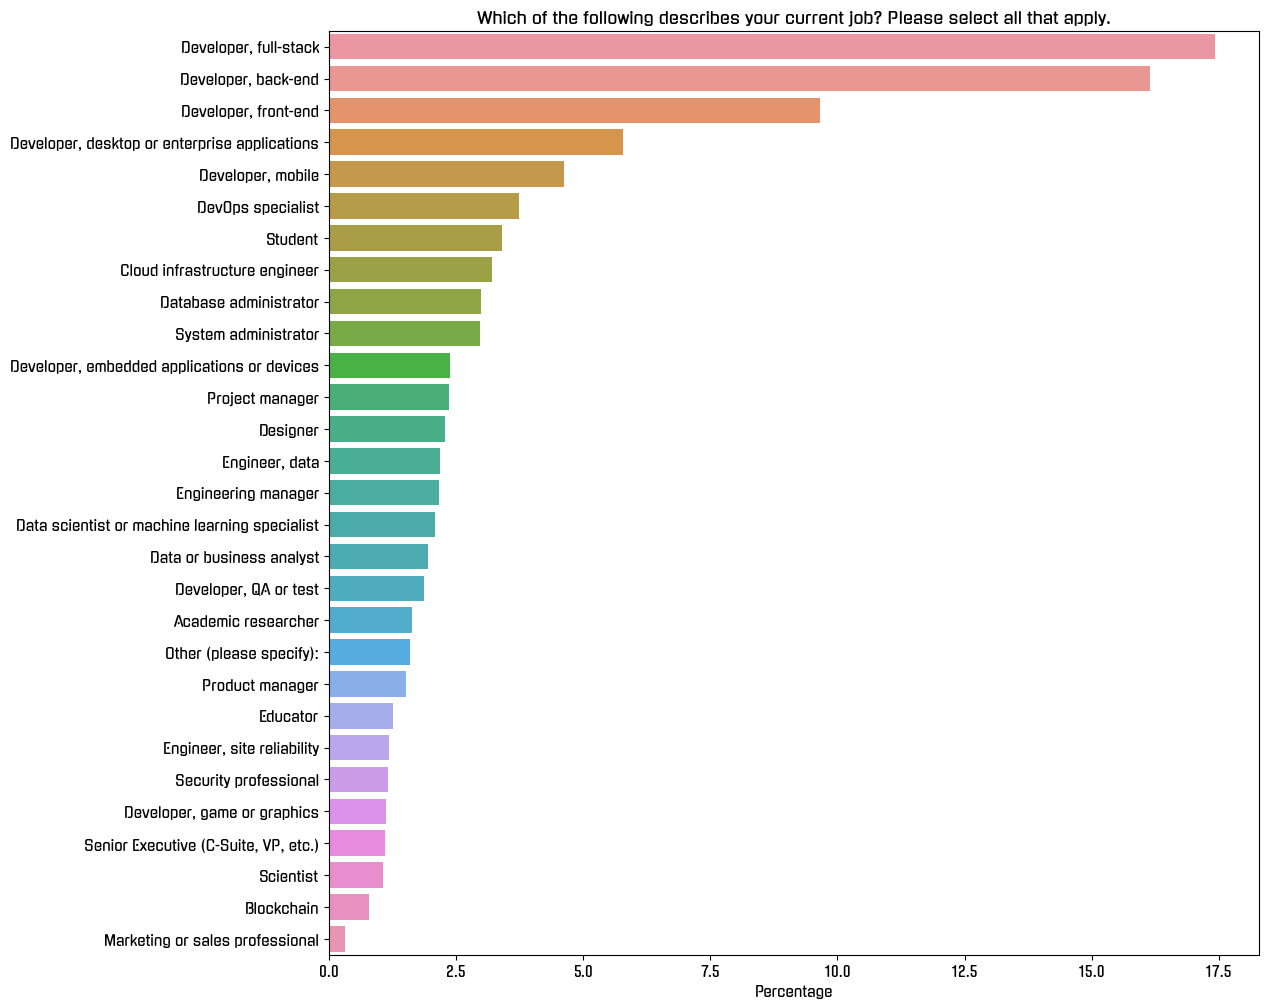

In [73]:
plt.figure(figsize=(12, 12))
plt.title(schema_raw["DevType"])
sns.barplot(x =  dev_type_per, y = dev_type_per.index )
plt.xlabel("Percentage")
plt.show()

In [90]:
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
   
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
df_type = split_multicolumn(survey_df['LanguageWantToWorkWith'])
df_type


lan_type_to = df_type.sum().sort_values(ascending = False)
lan_type_to


lan_type_per = lan_type_to / lan_type_to.sum() * 100
lan_type_per

round(lan_type_per.sum(),2)

100.0

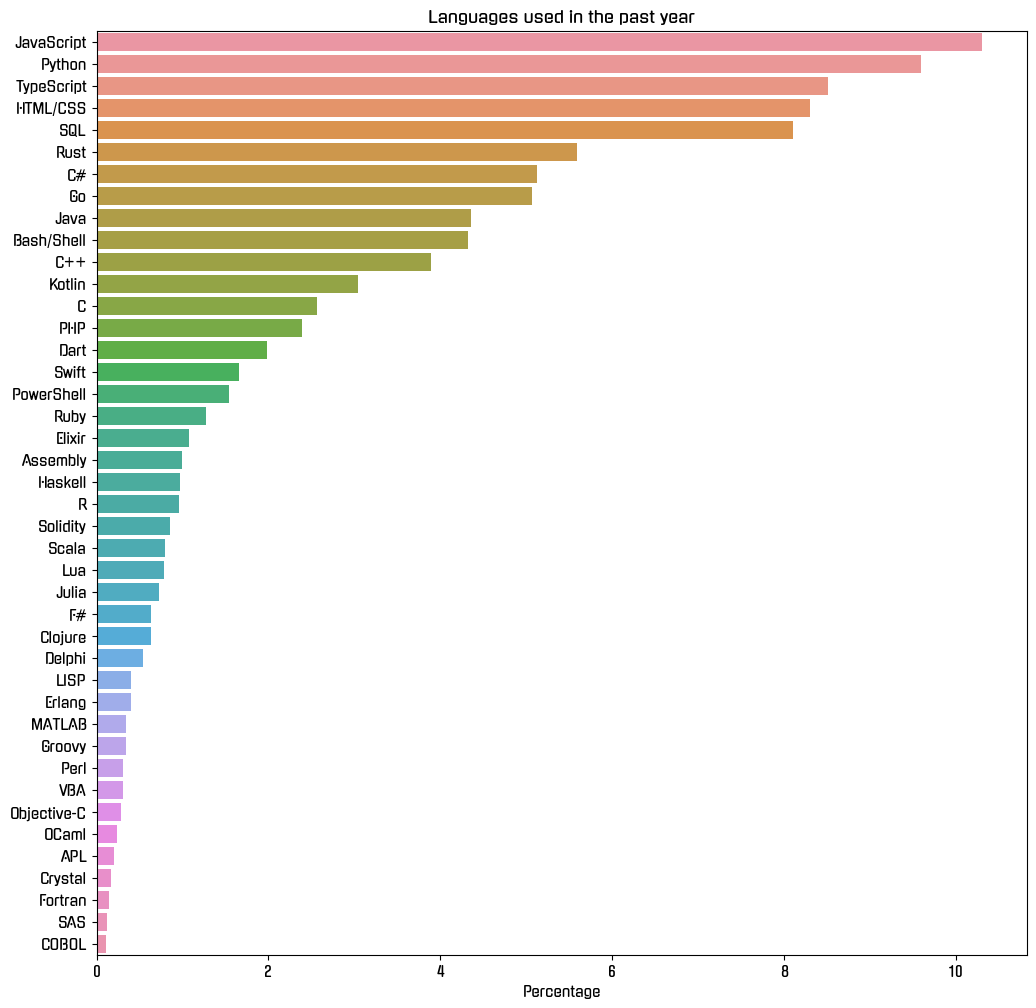

In [95]:
plt.figure(figsize=(12, 12))
plt.title("Languages used in the past year")
sns.barplot(x = lan_type_per, y = lan_type_per.index )
plt.xlabel("Percentage")
plt.show()

In [101]:
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    #위 코드에선 nan값제거해줘서 else노필요
   
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
df_type_lan = split_multicolumn(survey_df['Country'])
df_type_lan

,Canada,United Kingdom of Great Britain and Northern Ireland,Israel,United States of America,Germany,India,Netherlands,Croatia,Australia,Russian Federation,Czech Republic,Austria,Serbia,Italy,Ireland,Poland,Slovenia,Iraq,Sweden,Madagascar,Norway,Taiwan,Hong Kong (S.A.R.),Mexico,France,Brazil,Lithuania,Uruguay,Denmark,Spain,Egypt,Turkey,South Africa,Ukraine,Finland,Romania,Portugal,Singapore,Oman,...,Cuba,Togo,Angola,Isle of Man,Panama,Bahamas,Paraguay,Sudan,Liberia,Bhutan,Democratic Republic of the Congo,Côte d'Ivoire,Barbados,"Congo, Republic of the...",Namibia,Somalia,Sierra Leone,Mozambique,Lesotho,Chad,North Korea,Antigua and Barbuda,Papua New Guinea,Palau,Guinea,Haiti,Gabon,Mauritania,San Marino,Guyana,Saint Lucia,Burkina Faso,Brunei Darussalam,Gambia,Monaco,Djibouti,Seychelles,Solomon Islands,Saint Kitts and Nevis
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

Text(0.5, 0, 'percentages')

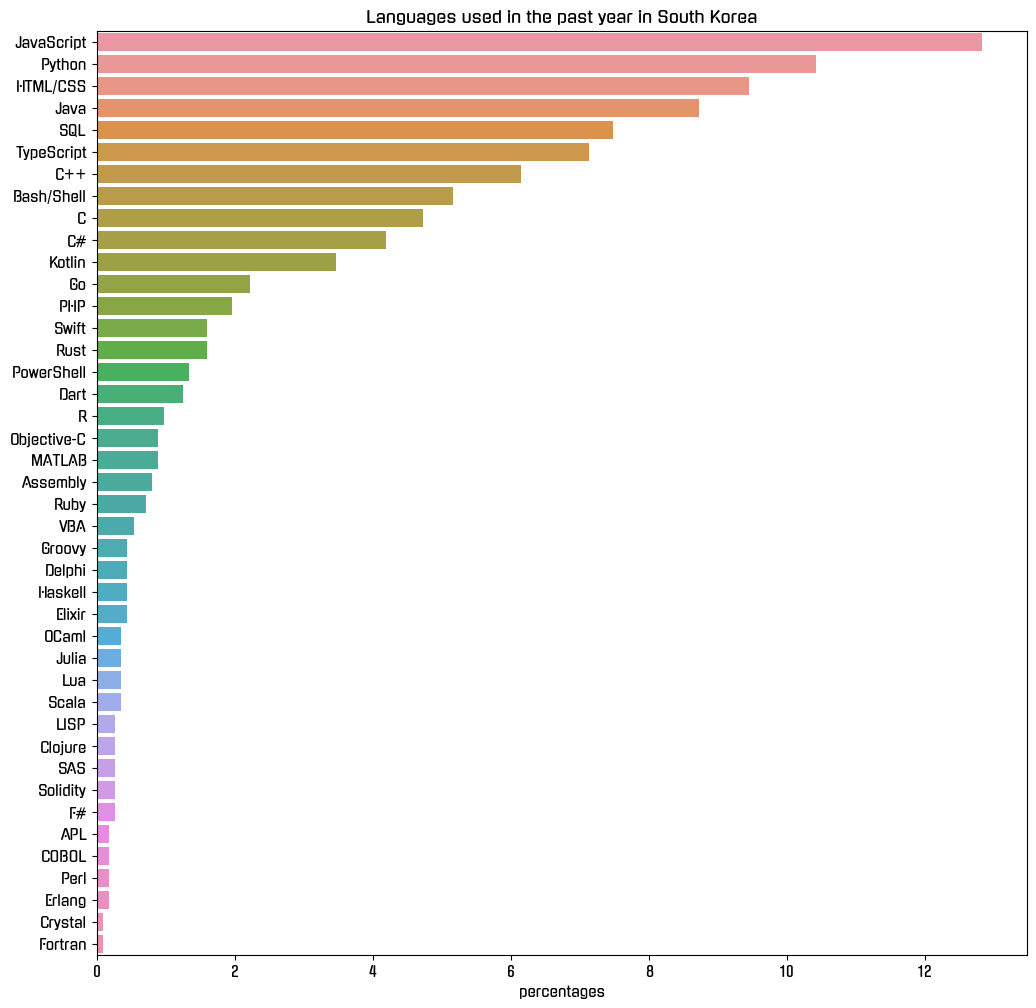

In [128]:
#South Korea인 사람만
##인덱싱
home_country = survey_df[survey_df.Country == "South Korea"]
#다른방법 : home_country = survey_df[(survey_df['Country'])]
#다른방법 : home_country = survey_df[(survey_df["Country"] == "South Korea") | (survey_df["Country"] == "Republic of Korea")]


##토탈 퍼센트
#
home_languages_worked_df = split_multicolumn(home_country.LanguageHaveWorkedWith)
home_languages_worked_df

#
home_languages_worked_totals = home_languages_worked_df.sum().sort_values(ascending=False)
home_languages_worked_totals

#
home_languages_worked_percentages = home_languages_worked_totals / home_languages_worked_totals.sum() * 100
home_languages_worked_percentages

#확인
home_languages_worked_percentages.sum()

#
plt.figure(figsize=(12, 12))
sns.barplot(x=home_languages_worked_percentages, y=home_languages_worked_percentages.index)
plt.title("Languages used in the past year in South Korea");
plt.xlabel('percentages')

Text(0.5, 0, 'percentages')

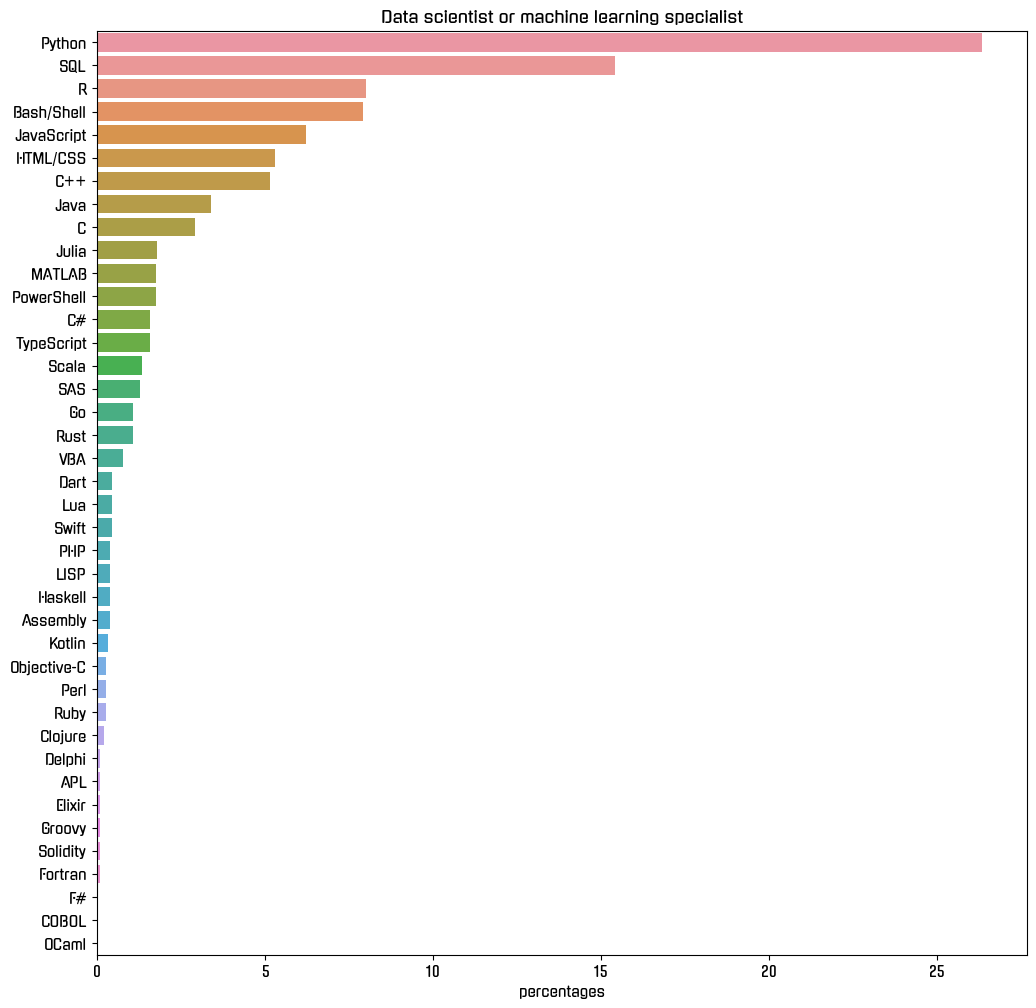

In [133]:
home_or = survey_df[survey_df.DevType == "Data scientist or machine learning specialist"]
home_or


home_or_df = split_multicolumn(home_or.LanguageHaveWorkedWith)
#복수개의 답변에 대한것을 ;으로 구분해서 하나의 문자열로 가지고있는것을 -> 여러칼럼으로 항목별로 다시나눠주는것  , 함수호출

#
home_or_totals = home_or_df.sum().sort_values(ascending=False)
home_or_totals

#
home_or_percentages = home_or_totals / home_or_totals.sum() * 100
home_or_percentages

#확인
home_languages_worked_percentages.sum()

# #
plt.figure(figsize=(12, 12))
sns.barplot(x=home_or_percentages, y=home_or_percentages.index)
plt.title("Data scientist or machine learning specialist");
plt.xlabel('percentages')

In [135]:
# home_lan = survey_df[survey_df.LanguageHaveWorkedWith]

# home_lan_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)




In [136]:
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
   
    for idx, rep in Series.str.split(';').items():
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df


home_lan = split_multicolumn(survey_df['LanguageHaveWorkedWith'])
home_lan



,JavaScript,C#,C++,C,Delphi,Bash/Shell,Elixir,HTML/CSS,Python,VBA,Dart,MATLAB,Java,Haskell,Assembly,Groovy,Go,Swift,APL,Crystal,PHP,Clojure,Erlang,Rust,Ruby,Perl,Kotlin,TypeScript,SQL,Lua,COBOL,PowerShell,LISP,Scala,Objective-C,F#,Julia,Fortran,OCaml,R,Solidity,SAS
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


### folium

In [ ]:
# 지도 데이터 시각화
# leaflet.js를 기반
# 지도에 마커를 표현, 범위를 나타내는 다양한 도형입력가능

# 콘다에서 설치하기

In [138]:
import folium

In [141]:
#플레이데이터 독산 위도, 경도
latitude, longitude = (37.468251, 126.886212)

In [143]:
m = folium.Map(location = [latitude, longitude],
              zoom_start = 17,
              width = 750,
              height = 500)
folium.Marker([latitude, longitude],
             popup = "플레이데이터",
             tooltrip = "플레이데이터").add_to(m)

m

In [146]:
survey_raw_df = pd.read_csv("data/survey_results_public.csv", index_col = "ResponseId")

countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

In [147]:
country_counts = survey_raw_df.Country.value_counts()

country_counts_df = pd.DataFrame({'Country' : country_counts.index,
                                 'Count' : country_counts.values})

country_counts_df

,Country,Count
0,United States of America,13543
1,India,6639
2,Germany,5395
3,United Kingdom of Great Britain and Northern I...,4190
4,Canada,2490
...,...,...
175,Monaco,1
176,Djibouti,1
177,Seychelles,1
178,Solomon Islands,1


In [149]:
country_counts_df.at[12, 'Country'] #'Russian Federation'
#Russia로 바꾸기
country_counts_df.at[12, 'Country'] = "Russia"

In [151]:
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data = country_counts_df,
    columns = ["Country", "Count"],
    key_on = "feature.properties.name",
    threshold_scale = [1, 30, 100, 300, 1_000, 3_000, 10_000, 14_000],
    fill_color = "YlGn",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "Respondents",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [152]:
#사진저장
m.save("Contry.html")

In [154]:
#서울시 행정구역
seoul_geojson="https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
m = folium.Map(
    location=[37.57, 126.99],
    zoom_start=11,
)
folium.Choropleth(
    geo_data=seoul_geojson,
    fill_color="#22AA44",
    fill_opacity=0.4,
    line_opacity=1,
).add_to(m)
m

### wordcloud

In [157]:
from wordcloud import WordCloud

In [158]:
survey_raw_df = pd.read_csv("data/survey_results_public.csv", index_col = "ResponseId")

In [160]:
survey_df.DevType

temp_words = survey_df.DevType.dropna()
temp_words

ResponseId
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
8                            Developer, full-stack;Student
9                                      Developer, back-end
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 61302, dtype: object

In [163]:
temp_words = temp_words.str.replace(';', ' ').str.replace(',',' ') #;->' '변경, , -> ' '변경 = 공백으로 변겅 
temp_words

ResponseId
3        Data scientist or machine learning specialist ...
4                                    Developer  full-stack
5        Developer  front-end Developer  full-stack Dev...
8                            Developer  full-stack Student
9                                      Developer  back-end
                               ...                        
73264                                  Developer  back-end
73265        Data scientist or machine learning specialist
73266    Developer  full-stack Developer  desktop or en...
73267    Developer  front-end Developer  desktop or ent...
73268    Developer  front-end Engineer  data Engineer  ...
Name: DevType, Length: 61302, dtype: object

In [167]:
words = ' '.join(temp_words) #가공한거 공백 기준 전부 합치기 -> 하나의 문자열로 
# words

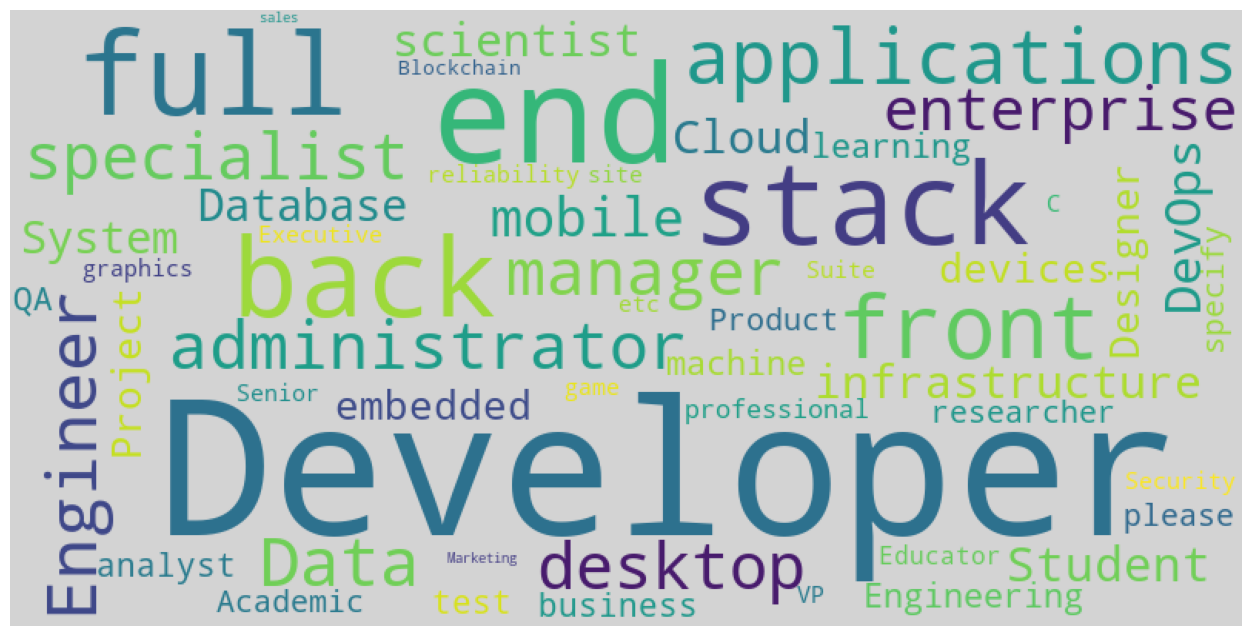

In [172]:
#한글에 포함되어있다면 한글폰트 지정해야함.
#font_paht=['폰트경로']
#max_font_size=60 --> 최대글자크기 지정


wc = WordCloud(collocation_threshold=int(1e6),
              width=800, height=400,
              background_color = 'lightgrey').generate(word)
              
plt.figure(figsize = (16, 8))


#x,y축을 그리지 않음
plt.axis("off")


#grid lines을 그리지 않음
plt.grid(False)
plt.imshow(wc)
plt.show()

In [173]:
#저장
wc.to_file("DevType.png")